# 06 Time series analysis

This practical is based on the blog post:
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?#

here we're going to reproduce that post.

Some code is provided. 

**Your task is to copy over and convert code from the blog post.** 


**You will run into errors and your task is to fix them.**

Some code on that page is still in python 2 and will raise errors. Other code uses outdated versions of `pandas` and `statsmodels` or other packages. As a data scientists who actively uses the web as a resource (as you should) you need to be aware of this and know how to fix it.

An error that you will run into when copying code from that post is the following:

`SyntaxError: Missing parentheses in call to 'print'. Did you mean print(g)?`

This is due to the fact that we are running Python 3, where `print` is a function and arguments must be put in parentheses. 

You can fix this by add the parentheses to the print statement.

Other solutions can be found by reading the documentation of the commands that fail, and by searching the web for error messages.

## Getting started

Normally, the blog site requires you to log in to see the beginning of the tutorial. We have provided that bit of code below so you don't need an account.


## Download and prepare data

In [1]:
from statsmodels.tsa import seasonal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import smtplib
%matplotlib inline


### Load the data

In [2]:
import pandas as pd
data = pd.read_csv('AirPassengers.csv')
data.head()



,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


You never go wrong with an initial plot:

<Axes: >

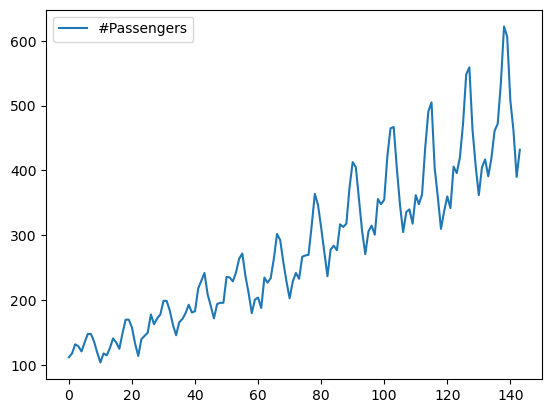

In [3]:
data.plot()

Notice that the x-axis has no label and doesn't seem to parse the month info.

Let's look at the datatypes:

In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

`Month` is an object, but it should be a date. Let's convert it:

In [5]:
data_ind = pd.DatetimeIndex(data['Month'])
data_ind

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now we need to set this as the index of the DataFrame:

In [6]:
data['Month'] = data_ind
data.set_index('Month', inplace=True)
print(data.dtypes)
data


#Passengers    int64
dtype: object


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Finally, let's plot it again:

<Axes: xlabel='Month'>

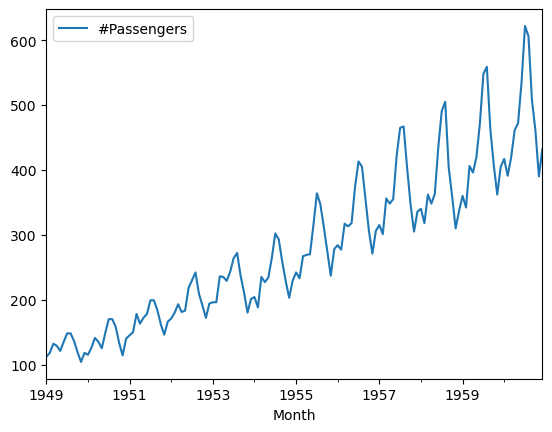

In [7]:
data.plot()

Notice how the month is now automatically annotated on the X-Axis, because we used the proper format.

## Over to you!!

Go to the [blog post](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?#) and work through the topics provided there, in the following order:

### 3. How to Check Stationarity of a Time Series?

In [8]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

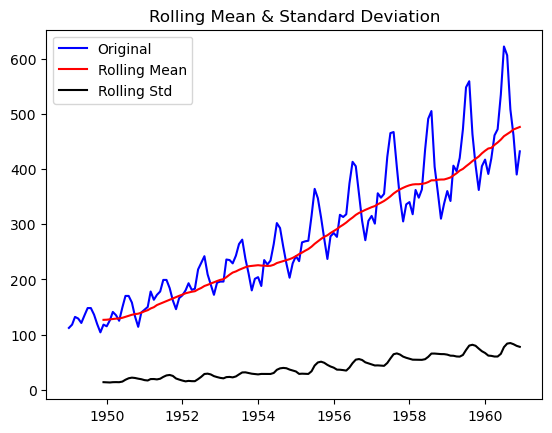

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
ts = data['#Passengers']  # assuming 'data' is your DataFrame
test_stationarity(ts)

<span style="color:blue">
    
**My Understanding:** 
    
* While executing the code from the blog, I have encountered error **AttributeError: module 'pandas' has no attribute 'rolling_mean'** indicates that the function rolling_mean does not exist in the pandas module.
    
**Note:**  functions `rolling_mean` and `rolling_std` are no longer available in the latest version of pandas. 
    
So, I have replaced them by `rolling().mean()` and `rolling().std()` respectively to fix this code block. 
    
</span>

### 4. How to make a Time Series Stationary?

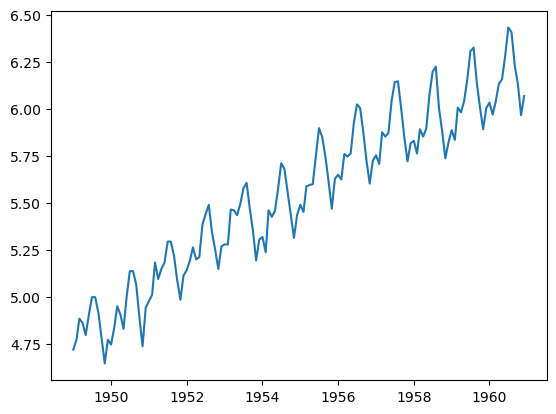

In [10]:
#Task 4
ts_log = np.log(ts)
plt.plot(ts_log)

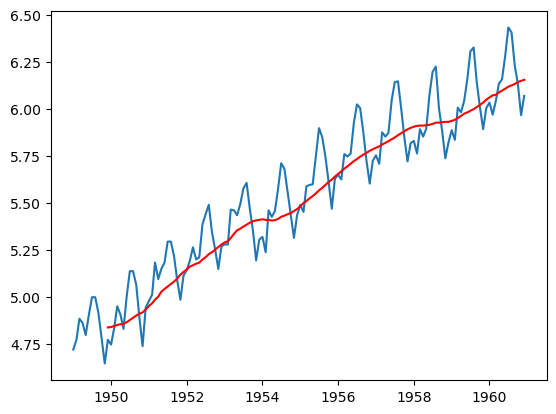

In [11]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [12]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)


Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

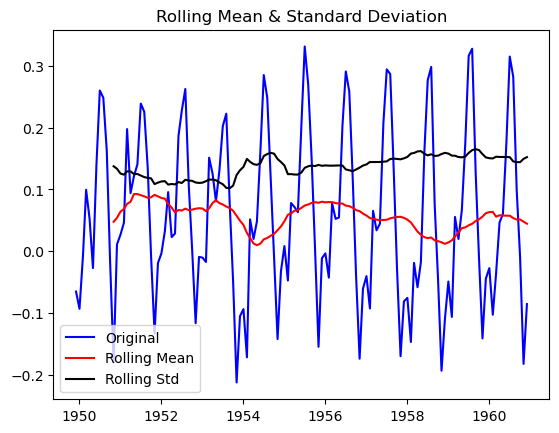

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [13]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

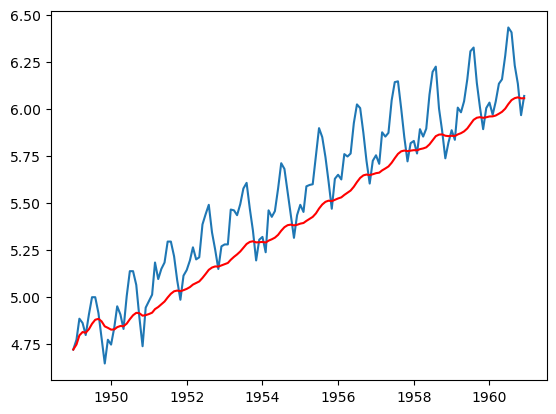

In [14]:
#expwighted_avg = pd.ewma(ts_log, halflife=12)

expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')



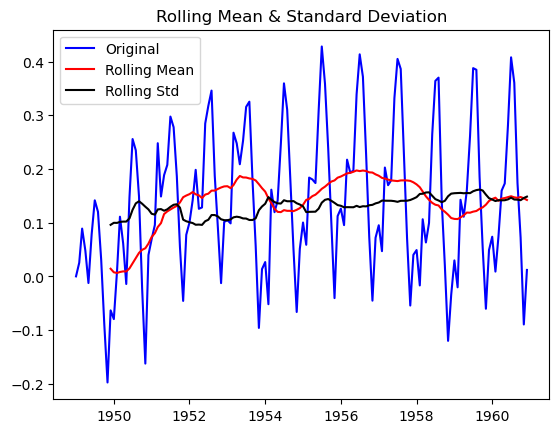

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

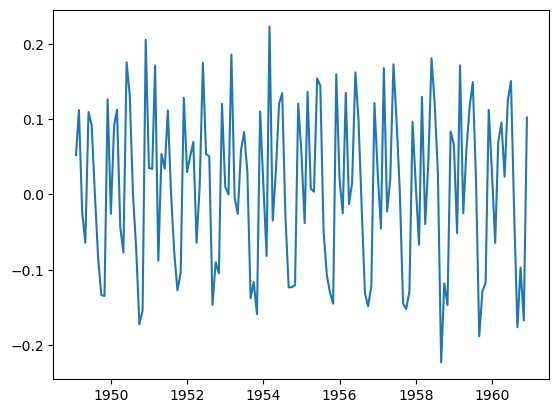

In [16]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

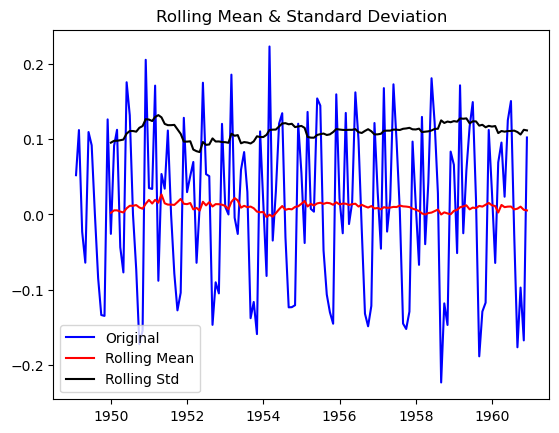

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [17]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


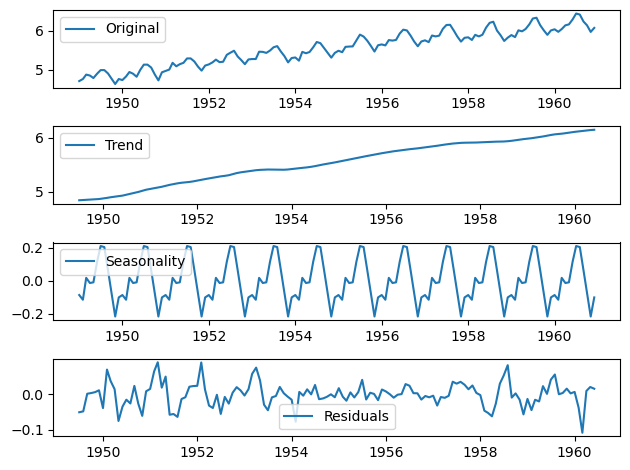

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

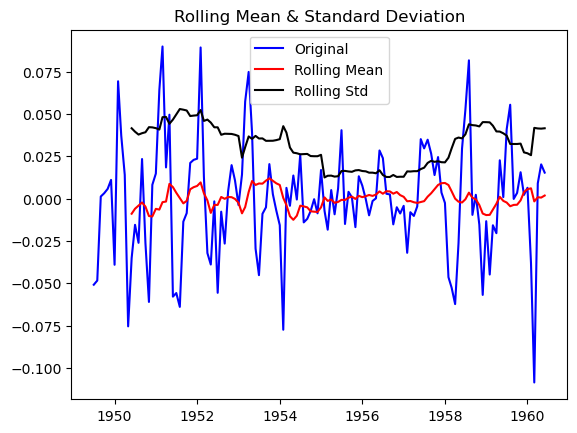

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [19]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### 5. Forecasting a Time Series

Note: The blog post uses an older version of `statsmodels`, where the ARIMA was implemented differently. If your `statsmodels` version is 12.0 or greater, then you will have to do two things:

1. where the blog post says `from statsmodels.tsa.arima_model import ARIMA`, you will have to use `from statsmodels.tsa.arima.model import ARIMA` (note the dot in place of the underscore)
2. where the blog post says `model = ARIMA(ts_log, order=(2, 1, 0))` or something similar, you must use `ts_log_diff` instead of `ts_log`, and the second parameter of the `order_` argmument must be zero instead of 1 (e.g. `order=(2,0,0)` instead of `order=(2,1,0)`. 

In [20]:
#Task 5.1  Forecasting a Time Series
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
data.index.freq = 'MS'

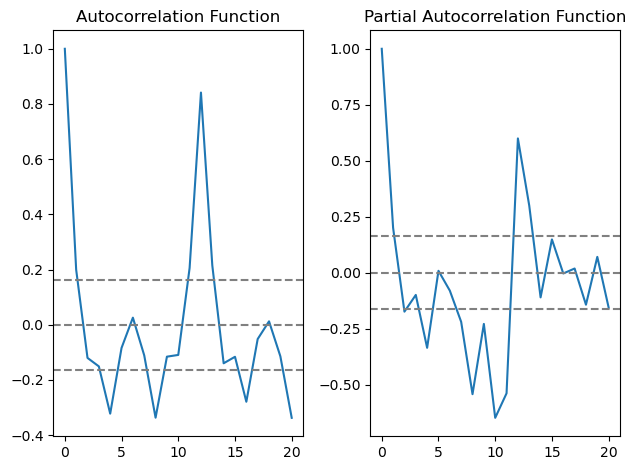

In [21]:
# ACF and PACF plots:

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


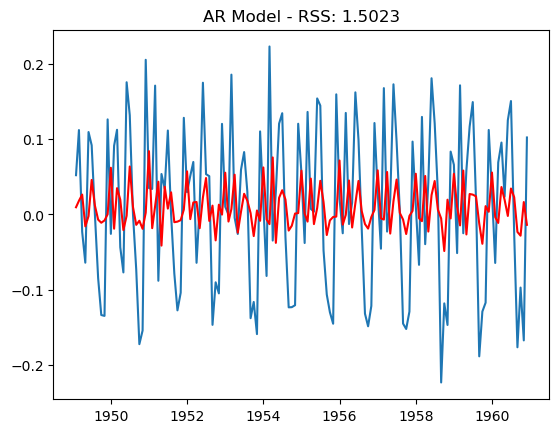

In [22]:

#Task 5.2 
#AR Model

from statsmodels.tsa.arima.model import ARIMA

model_AR = ARIMA(ts_log_diff, order=(2, 0, 0)) # argmument replaced with zero instead of 1 as instructed in Task 5.2
results_AR = model_AR.fit()
plt.plot(ts_log_diff) # Used ts_log_diff instead of ts_log as instructed in Task 5.2
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model - RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()


C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 1.4721')

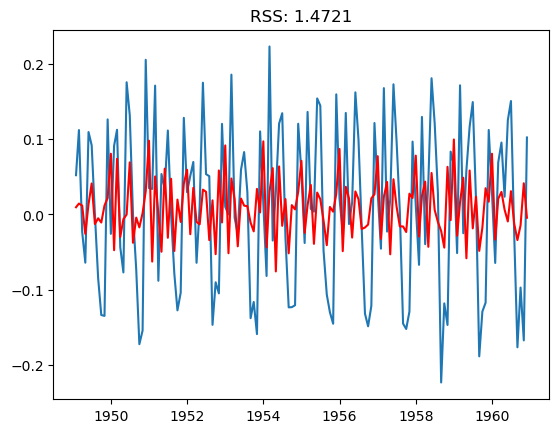

In [23]:
#MA Model
model = ARIMA(ts_log_diff, order=(0, 0, 2))  # argmument replaced with zero instead of 1 as instructed in Task 5.2
results_MA = model.fit()  
plt.plot(ts_log_diff) # Used ts_log_diff instead of ts_log as instructed in Task 5.2
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))


C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Raveena\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 1.2170')

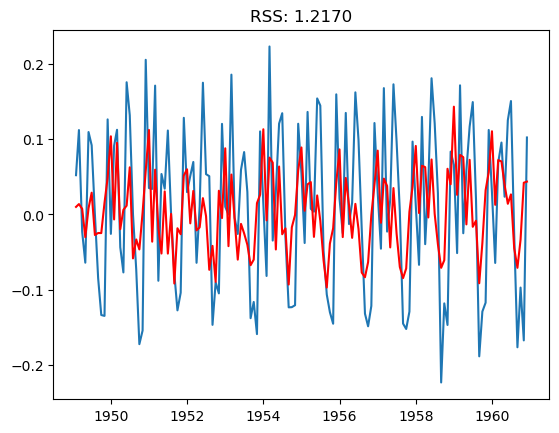

In [24]:
#Combined Model
model = ARIMA(ts_log_diff, order=(2, 0, 2))   # argmument replaced with zero instead of 1 as instructed in Task 5.2
results_ARIMA = model.fit()  
plt.plot(ts_log_diff) # Used ts_log_diff instead of ts_log as instructed in Task 5.2
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.010052
1949-03-01    0.013816
1949-04-01    0.007494
1949-05-01   -0.030139
1949-06-01    0.008387
dtype: float64


In [26]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.010052
1949-03-01    0.023867
1949-04-01    0.031361
1949-05-01    0.001222
1949-06-01    0.009609
dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()



Month
1949-01-01    4.718499
1949-02-01    4.728550
1949-03-01    4.742366
1949-04-01    4.749860
1949-05-01    4.719721
dtype: float64

Text(0.5, 1.0, 'RMSE: 176.8101')

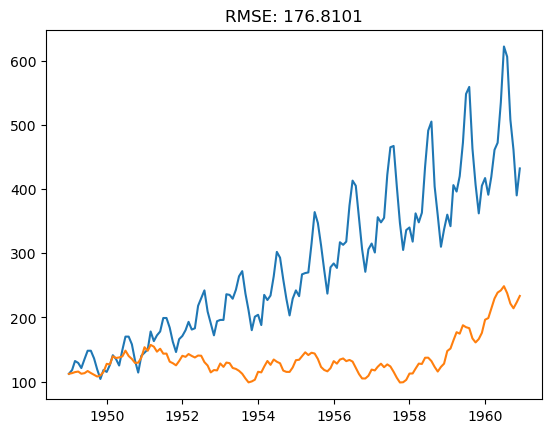

In [28]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))


# That's it!

We leave out the part with R. 

You have successfully learnt how to check stationarity of a time series, how to make a timeseries stationary, and how to do a forecast. Congratulations!